##  INTRODUCTION

#### The dataset contains count of public bicycles rented per hour in the __Seoul Bike Sharing System__, with corresponding weather data and holiday information.

#### Additional Information

Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes. 
The dataset contains __weather information__ (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the __number of bikes rented per hour__ and __date information__. 

### Columns present and their meaning
1. __Date__ : year-month-day
2. __Rented Bike count__ - Count of bikes rented at each hour
3. __Hour__ - Hour of he day
4. __Temperature__ - Temperature in Celsius
5. __Humidity__ - %
6. __Windspeed__ - m/s
7. __Visibility__ - 10m
8. __Dew point temperature__ - Celsius 
9. __Solar radiation__ - MJ/m2
10. __Rainfall__ - mm
11. __Snowfall__ - cm
12. __Seasons__ - Winter, Spring, Summer, Autumn
13. __Holiday__ - Holiday/No holiday
14. __Functional Day__ - NoFunc(Non Functional Hours), Fun(Functional hours)

#### Load the modules

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

### Data Loading and Cleaning

In [2]:
#load the dataset 
seoul_df = pd.read_csv("SeoulBikeData.csv",  encoding='latin1')


In [3]:
#display the first 5 rows of the data
seoul_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


##### Check for missing values in the dataset columns

In [4]:
seoul_df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

The dataset has no missing values in any of the columns.

##### Check the data type of the columns in the dataset

In [5]:
seoul_df.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

We need to convert the ***Date*** and ***Hour*** column into date time objects

In [6]:
#start with the Date Column
seoul_df['Date'] = pd.to_datetime(seoul_df['Date'], dayfirst=True)


In [7]:
#Combine Date and Hour to get full datetime
seoul_df['Datetime'] = seoul_df['Date'] + pd.to_timedelta(seoul_df['Hour'], unit='h')

In [8]:
seoul_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Datetime
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01 00:00:00
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01 01:00:00
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01 02:00:00
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01 03:00:00
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01 04:00:00


##### Check for any duplicates in the data

In [9]:
duplicates = seoul_df.duplicated().sum()
print(f"There are {duplicates} duplicates in the dataset.")

There are 0 duplicates in the dataset.


##### Convert all the column names to lowercase values for convenience


In [10]:
seoul_df.columns = seoul_df.columns.str.lower()
seoul_df.columns


Index(['date', 'rented bike count', 'hour', 'temperature(°c)', 'humidity(%)',
       'wind speed (m/s)', 'visibility (10m)', 'dew point temperature(°c)',
       'solar radiation (mj/m2)', 'rainfall(mm)', 'snowfall (cm)', 'seasons',
       'holiday', 'functioning day', 'datetime'],
      dtype='object')

## Descriptive Statistics

In [11]:
seoul_df.describe()

,date,rented bike count,hour,temperature(°c),humidity(%),wind speed (m/s),visibility (10m),dew point temperature(°c),solar radiation (mj/m2),rainfall(mm),snowfall (cm),datetime
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760
mean,2018-05-31 23:59:59.999999744,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,2018-06-01 11:30:00
min,2017-12-01 00:00:00,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,2017-12-01 00:00:00
25%,2018-03-02 00:00:00,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,2018-03-02 05:45:00
50%,2018-06-01 00:00:00,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,2018-06-01 11:30:00
75%,2018-08-31 00:00:00,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,2018-08-31 17:15:00
max,2018-11-30 00:00:00,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,2018-11-30 23:00:00
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN


The output suggests the following:
1. **Rented Bike Count** : the __mean value__ (***704.6021***) being higher than the __median value__ (***504.5***) suggests that our data distribution is rightly skewed with some high outliers — some hours of the day having a large amount of bikes rented than others — pushing the average upwards. This is backed up the high __standard deviation__ (***644.9975***) which suggests that the hourly rentals of bike might be affected by the weather conditions recorded; **humidity**, **temperature**, **rainfall** and **snowfall**.


In [12]:
seoul_df.describe(include= 'object')

,seasons,holiday,functioning day
count,8760,8760,8760
unique,4,2,2
top,Spring,No Holiday,Yes
freq,2208,8328,8465


## Exploratory Data Analysis

####  1. What is the distribution of bike rentals across different hours of the day?

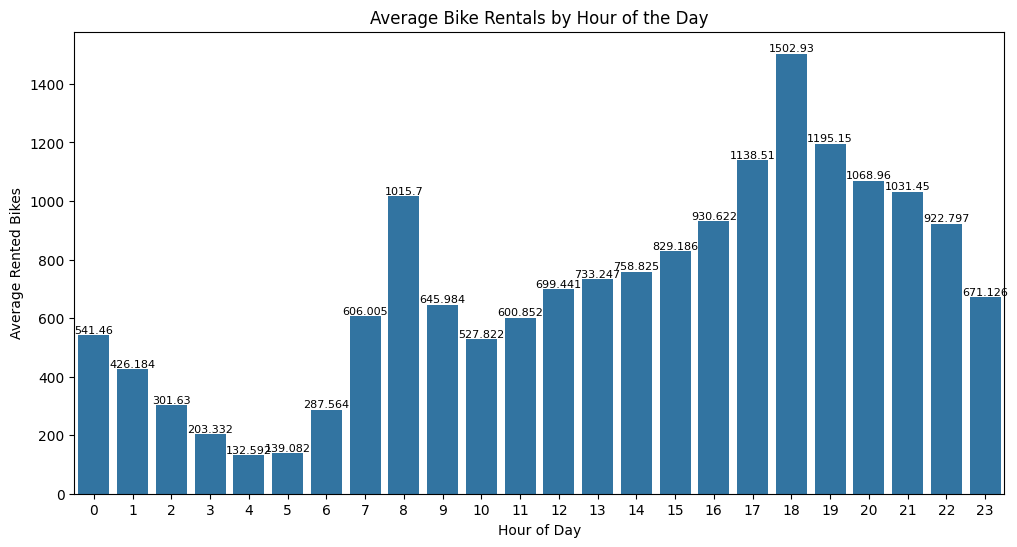

In [13]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=seoul_df, x='hour', y='rented bike count', estimator='mean', errorbar=None)
plt.title('Average Bike Rentals by Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Rented Bikes')
plt.xticks(range(0, 24))
ax.bar_label(ax.containers[0], fontsize=8)
plt.show();


Based on the results of the graph, we can determine that:
1. during the evening hours at **6:00 pm**, is when there is the highest demand for bikes being rented in the city with the amount of bikes being rented being approximately **1503**. We can see that during the early morning hours of **04:00 am** is when there is the lowest amount of bikes rented with the number standing at approximately **133** bikes.

2. There is an upward trend in the number of bikes being rented from **10:00 am** until **6:00 pm** with the trend starting to go downwards from **7:00pm** till **4:00pm**.

#### 2. What is the average number of bikes rented by season, holiday status, and functional day?

In [14]:
#group the rented bikes with the season, holiday status and functioning day
seoul_grouped = seoul_df.groupby(["seasons", "holiday", "functioning day"])["rented bike count"]
seoul_bike_demand = seoul_grouped.mean().reset_index()
seoul_bike_demand

,seasons,holiday,functioning day,rented bike count
0,Autumn,Holiday,No,0.000000
1,Autumn,Holiday,Yes,948.104167
2,Autumn,No Holiday,No,0.000000
3,Autumn,No Holiday,Yes,922.859316
4,Spring,Holiday,Yes,635.305556
5,Spring,No Holiday,No,0.000000
6,Spring,No Holiday,Yes,750.079981
7,Summer,Holiday,Yes,1022.145833
8,Summer,No Holiday,Yes,1034.338426
9,Winter,Holiday,Yes,156.625000


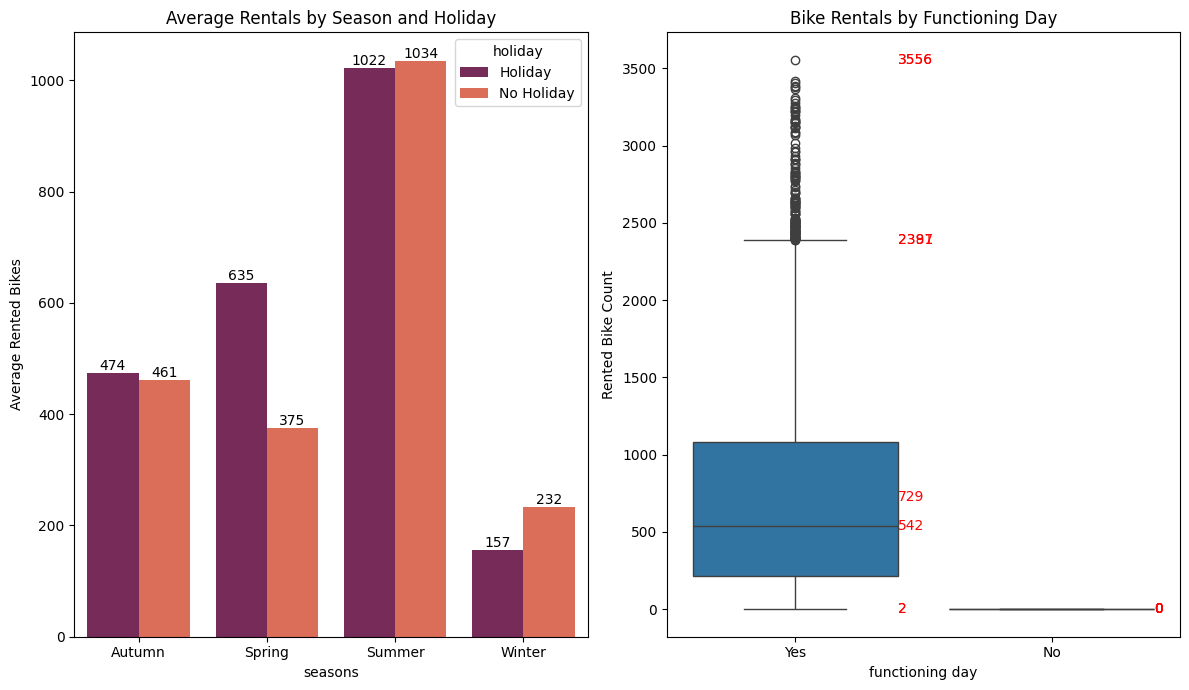

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(12, 7))
#bar plot to show the average rentals by season and holiday
ax = sns.barplot(data=seoul_bike_demand, x='seasons', y='rented bike count', hue='holiday', palette='rocket', ax=axes[0], errorbar=None)
axes[0].set_title("Average Rentals by Season and Holiday")
axes[0].set_ylabel("Average Rented Bikes")
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge')

#boxplot to show functioning day
sns.boxplot(data=seoul_df, x='functioning day', y='rented bike count', ax=axes[1])
axes[1].set_title("Bike Rentals by Functioning Day")
axes[1].set_ylabel("Rented Bike Count")

# Offsets to nudge annotations to the right of the boxes
x_offset = 0.4

for i, day in enumerate(seoul_df['functioning day'].unique()):
    subset = seoul_df[seoul_df['functioning day'] == day]['rented bike count']
    q1 = subset.quantile(0.25)
    q3 = subset.quantile(0.75)
    iqr = q3 - q1
    lower_whisker = max(subset[subset >= (q1 - 1.5 * iqr)].min(), subset.min())
    upper_whisker = min(subset[subset <= (q3 + 1.5 * iqr)].max(), subset.max())
    outliers = subset[(subset < (q1 - 1.5 * iqr)) | (subset > (q3 + 1.5 * iqr))]
    extreme_low = outliers.min() if not outliers.empty else None
    extreme_high = outliers.max() if not outliers.empty else None

    stats_to_plot = [
        subset.min(),
        subset.max(),
        lower_whisker,
        upper_whisker,
        subset.mean(),
        subset.median(),
        extreme_low,
        extreme_high
    ]

    for value in filter(lambda v: v is not None, stats_to_plot):
        axes[1].text(x=i + x_offset, y=value, s=f'{int(value)}', ha='left', va='center', fontsize=10, color='red')


plt.tight_layout()  
plt.show();

Based on the results we can determine the following:
1. The demand for rented bikes was highest during the **summer** season with the difference between the **holiday and non holiday** periods being slightly small.
2. The demand for rented bikes was lowest during the **winter** season especially during the **holiday** season period being the lowest overall all year.
3. On the days when the rented bike facilities were **open** or in this case ***functioning*** the demand for rental bikes hit a peak of **3556** at one point, but during regular periods, the **average** number of rental bikes demand was approximately **729**. On **functioning days**, the lowest number of bikes rented was just **2** while the highest number was just **2387**.
4. On days when the rented bike facilities were **non functioning** or in this case **closed**, no bikes were rented.

#### 3. Are there daily, weekly, or seasonal patterns in the rental counts?



In [16]:
#first lets build new columns in our Seoul Dataframe
seoul_df['day'] = seoul_df['datetime'].dt.day
seoul_df['month'] = seoul_df['datetime'].dt.month
seoul_df['weekday'] = seoul_df['datetime'].dt.day_name()
seoul_df['week'] = seoul_df['datetime'].dt.isocalendar().week
seoul_df['year'] = seoul_df['datetime'].dt.year

In [17]:
#call the first three rows to see the new version of our dataset
seoul_df.head(3)

,date,rented bike count,hour,temperature(°c),humidity(%),wind speed (m/s),visibility (10m),dew point temperature(°c),solar radiation (mj/m2),rainfall(mm),snowfall (cm),seasons,holiday,functioning day,datetime,day,month,weekday,week,year
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01 00:00:00,1,12,Friday,48,2017
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01 01:00:00,1,12,Friday,48,2017
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01 02:00:00,1,12,Friday,48,2017


##### Show the daily patterns

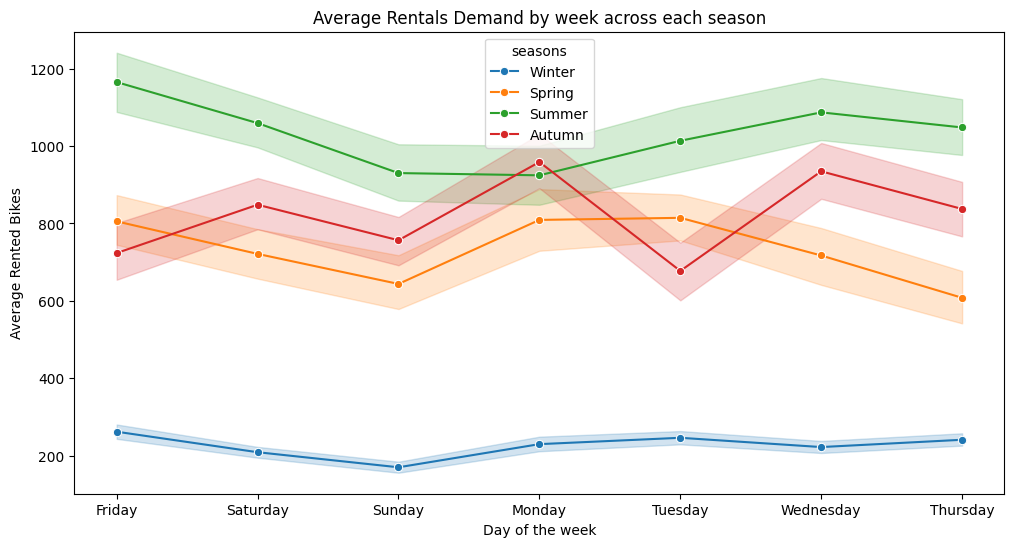

In [18]:
#plot a line chart to show the daily pattern
plt.figure(figsize=(12, 6))
sns.lineplot(data=seoul_df, x='weekday', y='rented bike count', hue='seasons', estimator='mean',marker='o')


plt.title('Average Rentals Demand by week across each season')
plt.xlabel('Day of the week')
plt.ylabel('Average Rented Bikes')

plt.show()

Based on the results we can determine that each season of the year had different days in which they would experience high rentals bike rates. The results show that the **Summer** period is when there was the highest amount of bike rented in a daily cycle while during the **Winter** months the demand is the lowest across a week

#### Show the weekly patterns

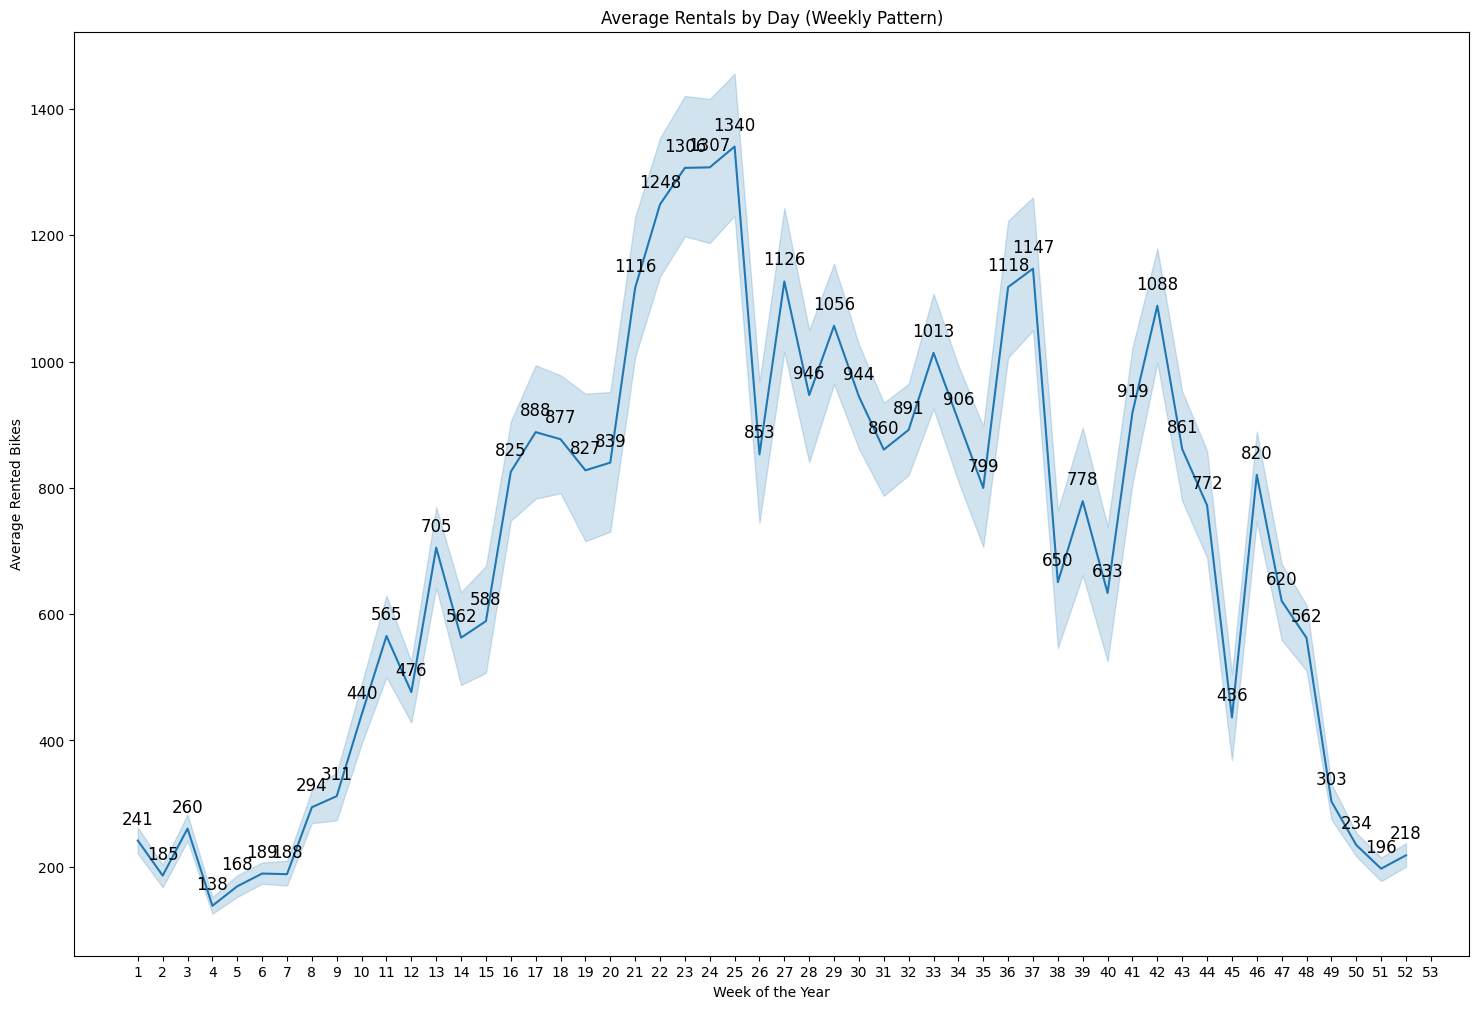

In [19]:
plt.figure(figsize=(18, 12))
ax = sns.lineplot(data=seoul_df, x='week', y='rented bike count', estimator='mean')
# Calculate mean values per week
grouped = seoul_df.groupby('week')['rented bike count'].mean()

# Add value labels above each point
for week, value in grouped.items():
    ax.text(week, value + 20, f'{int(value)}', ha='center', va='bottom', fontsize=12)
    
plt.title('Average Rentals by Day (Weekly Pattern)')
plt.xlabel('Week of the Year')
plt.ylabel('Average Rented Bikes')
plt.xticks(range(1, 54))

plt.show()

Based on the results we can determine that:
1. during the **25th week** of the year is when the rate of rented bikes was at an all time high during the year, which we know to be around the **last week of May and the first week of June**, specifically around **May 29 2018 to June 4th 2018**.
2. Because in the dataset, the first date recorded was **2017-12-01** and this is during **Winter**, we can conclude that in this period is when the rate of rental bike hire is at its lowest, (at an average rate of **138**) with **Week 4** being our lowest at all time since it might be the week when **Christmas** occurs in South Korea.
3. As the year continues, there is a rise in the number of rental bikes being rated but it seems to fluctuate depending on certain weeks of the year but as **Autumn** sets in the demand continues to fall all the way to **Winter** before slowly rising again when **Spring** occurs.
4. The shaded region around the line represents the **95% confidence interval** , reflecting the reliability of the average at each point. When the shaded area is narrow, it means bike rental numbers are consistently **low** across those weeks while if the shaded area is wide, the bike rental numbers are consistently **high** during that period with outliers being possible in both shaded regions (lower than normal bike rental rates or higher than normal bike rental rates)

#### Show the seasonal patterns

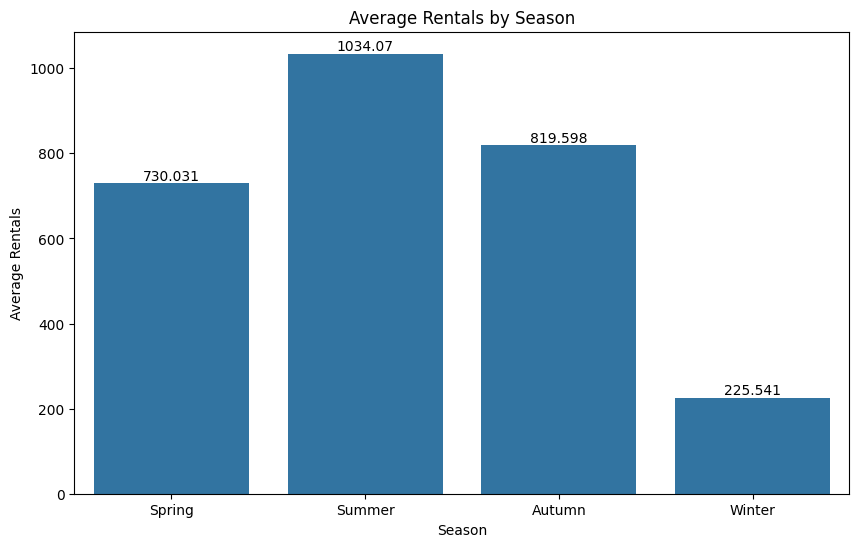

In [20]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=seoul_df, x='seasons', y='rented bike count', estimator='mean', order=['Spring', 'Summer', 'Autumn', 'Winter'], errorbar=None)
plt.title('Average Rentals by Season')
plt.xlabel('Season')
plt.ylabel('Average Rentals')
ax.bar_label(ax.containers[0], fontsize=10)
plt.show()

Based on the results, we can determine that:
1. **Winter** is the period in which their is an extremely low amount of bike rentals being taken up by people.
2. From winter till summer, there is a rise in bike rental rates with it slowly falling in autumn before dipping extremely in winter.

### 4. How are weather variables correlated with each other and with rental count?

In [21]:
#assign a variable to all the numeric columns in our dataset for the correlation 
seoul_numeric_group = ['rented bike count', 'temperature(°c)', 'humidity(%)', 'wind speed (m/s)', 'visibility (10m)', 'dew point temperature(°c)',  'solar radiation (mj/m2)'
                       , 'rainfall(mm)', 'snowfall (cm)']
seoul_numeric_group_df = seoul_df[seoul_numeric_group]

seoul_numeric_group_df.head()

,rented bike count,temperature(°c),humidity(%),wind speed (m/s),visibility (10m),dew point temperature(°c),solar radiation (mj/m2),rainfall(mm),snowfall (cm)
0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0


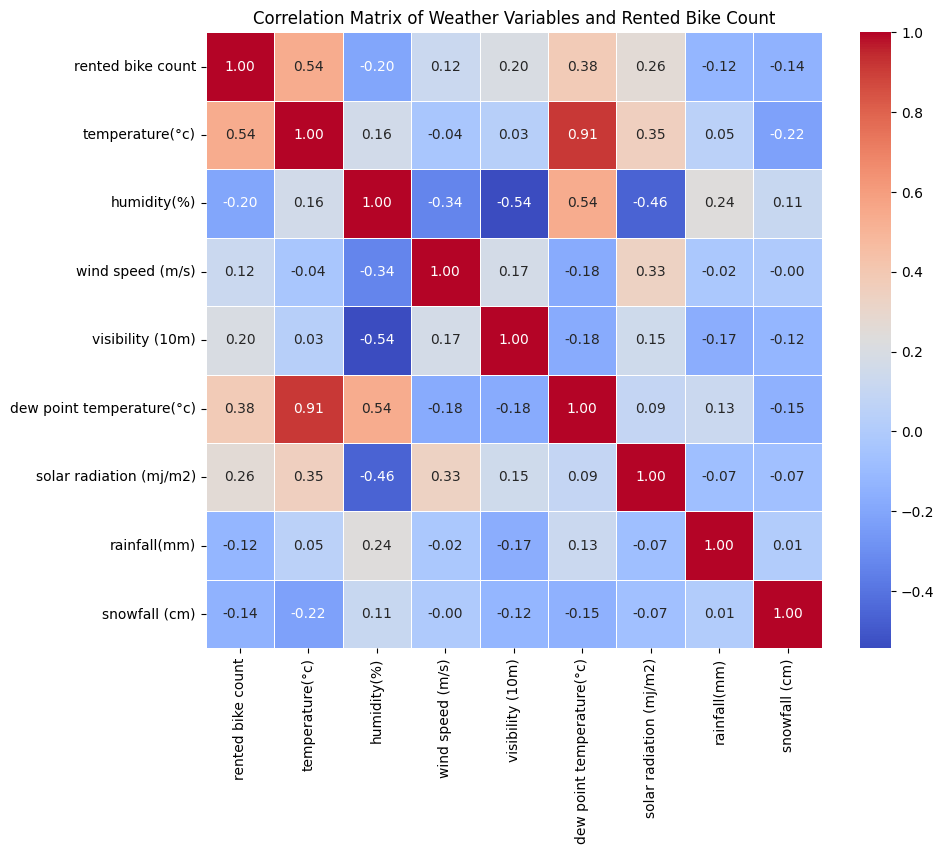

In [22]:
#calculate the correlation matrix and build a heatmap
correlation_matrix = seoul_numeric_group_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title("Correlation Matrix of Weather Variables and Rented Bike Count")
plt.show()


Based on the results, we can conclude the following:
1. There is a **moderate positive correlation** between the **rented bike counts** and the **temperature(°c)** of **0.54**. This suggests that when temperatures are high, the rate at which rental bikes are sought out for rises.
2. Therer is a **weak negative correlation** between the **rented bike counts** and the **humidity(%)** of **-0.20**. This suggests that when their is a low amount of moisture in the air, the rate at rental bikes were sought out for is slightly reduces.
3. There is a **weak positive correlation** between the **rented bike counts** and the **windspeed(m/s)**  of **0.12**. This suggests that wind speeds have little affect on rental bike rates.
4. There is a **weak positive correlation** between the **rented bike counts** and the **visibility** of **0.20**. This suggests that visibility has little affect on rental bike rates.
5. There is a **weak to moderate positive correlation** between the **rented bike counts** and the **solar radiation (mj/m²)** of **0.26**. This suggests that more sunlight slightly increases rental bike rates.
6. There is a **moderate positive correlation** between the **rented bike counts** and the **dew point temperature** of **0.38**. This suggests that warmer air increase the rate of rental bikes being sought out.
7. There is a **weak negative correlation** betweeen the **rented bike counts** and the **rainfall (mm)** of **-0.12**. This suggests that more rainfall causes a decrease in rental bike rates.
8. There is a **weak negative correlation** between the **rented bike counts** and the **snowfall (cm)** of **-0.14**. This suggests that more snowfall causes a decrease in rental bike rates.

#### Build scatterplots to show relationship between Rental Bike Counts and Temperature, Humidity, Visibility, Dew Point temperature and Solar Radiation

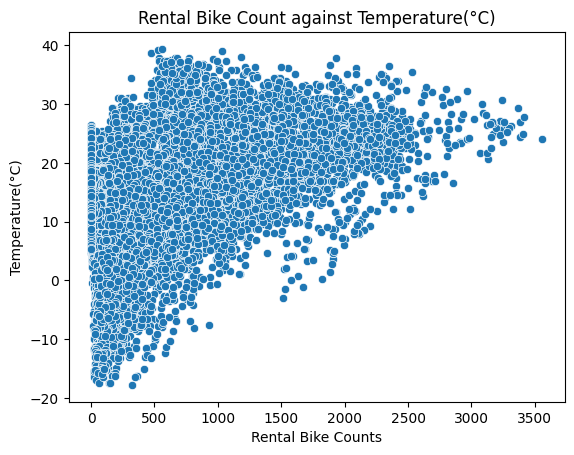

In [23]:
#to show relationship between Rental Bike Counts and Temperature (°c)
sns.scatterplot(data=seoul_df, x='rented bike count', y='temperature(°c)')
plt.xlabel("Rental Bike Counts")
plt.ylabel("Temperature(°C)")

plt.title("Rental Bike Count against Temperature(°C)");

Based on the results of the scatterplot, we can state that there is a **strong positive linear relationship**. This shows that as temperature rises, the rate at which rental bikes are hired rises to.

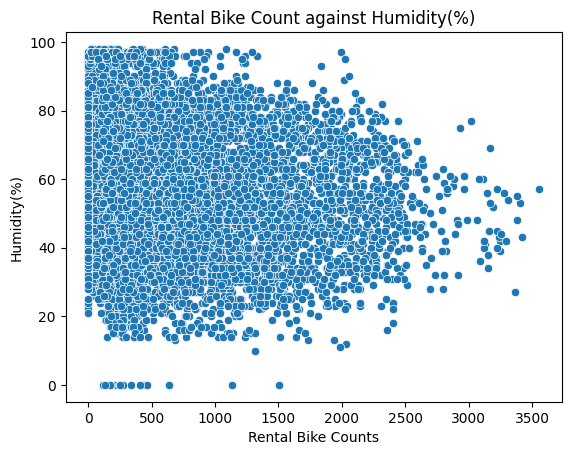

In [24]:
#to show relationship between Rental Bike Counts and humidity
sns.scatterplot(data=seoul_df, x='rented bike count', y='humidity(%)')
plt.xlabel("Rental Bike Counts")
plt.ylabel("Humidity(%)")
plt.title("Rental Bike Count against Humidity(%)");

Based on the results of our scatterplot, we can observe a **weak to moderate negative linear relationship**. This shows that as the level of moisture in the air decreases, there is a slight fall in the rate at which rental bikes are hired.

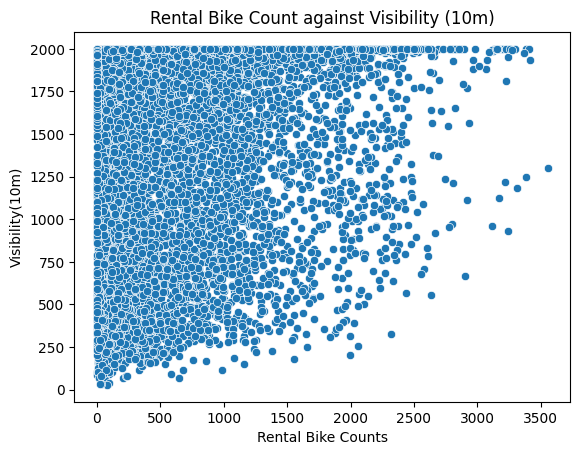

In [25]:
#to show relationship between Rental Bike Counts and Visibilty(10m)
sns.scatterplot(data=seoul_df, x='rented bike count', y='visibility (10m)')
plt.xlabel("Rental Bike Counts")
plt.ylabel("Visibility(10m)")
plt.title("Rental Bike Count against Visibility (10m)");

Based on the results, we can observe a **weak positive linear relationship** in the scatterplot. This suggests that the rental bike rates slightly increases when visibility is high.

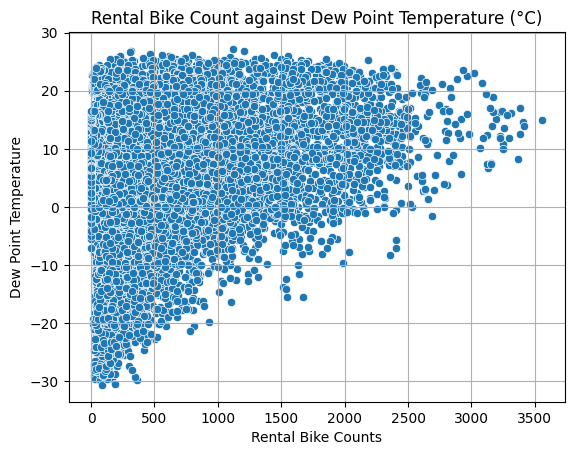

In [26]:
#to show relationship between Rental Bike Counts and Dew Point Temperature
sns.scatterplot(data=seoul_df, x='rented bike count', y='dew point temperature(°c)')
plt.xlabel("Rental Bike Counts")
plt.ylabel("Dew Point Temperature")
plt.grid(True)
plt.title("Rental Bike Count against Dew Point Temperature (°C)");

Based on the results of the scatterplot, there is a **moderate positive linear relationship**. This suggests that as the dew point temperature increases, the rate at which rental bikes are sought out for increases.

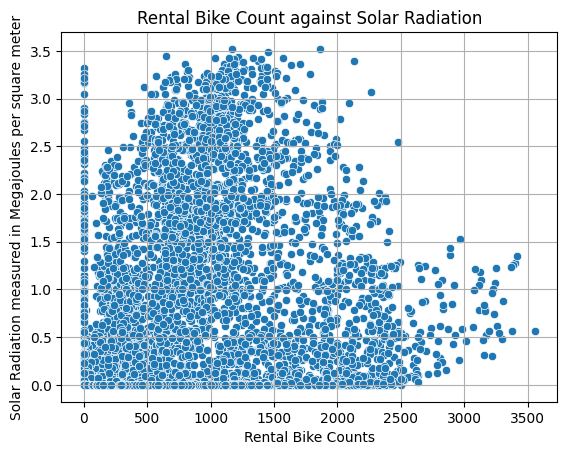

In [27]:
#to show relationship between Rental Bike Counts and Solar Radiation (mj/m²)
sns.scatterplot(data=seoul_numeric_group_df, x='rented bike count', y='solar radiation (mj/m2)')
plt.xlabel("Rental Bike Counts")
plt.ylabel("Solar Radiation measured in Megajoules per square meter")
plt.grid(True)
plt.title("Rental Bike Count against Solar Radiation");

Based on the results of the scatterplot, there is a **moderate positive linear relationship**. This suggests that an increase in solar radiation causes a slight increase in the rate at which rental bikes are acquired.

### Feature Engineering

In [28]:
#look at the dataset first
seoul_df.head()

,date,rented bike count,hour,temperature(°c),humidity(%),wind speed (m/s),visibility (10m),dew point temperature(°c),solar radiation (mj/m2),rainfall(mm),snowfall (cm),seasons,holiday,functioning day,datetime,day,month,weekday,week,year
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01 00:00:00,1,12,Friday,48,2017
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01 01:00:00,1,12,Friday,48,2017
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01 02:00:00,1,12,Friday,48,2017
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01 03:00:00,1,12,Friday,48,2017
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01 04:00:00,1,12,Friday,48,2017


In [29]:
#drop the date and datetime columns
new_seoul_df = seoul_df.drop(['date', 'datetime'], axis=1)
new_seoul_df.head()

,rented bike count,hour,temperature(°c),humidity(%),wind speed (m/s),visibility (10m),dew point temperature(°c),solar radiation (mj/m2),rainfall(mm),snowfall (cm),seasons,holiday,functioning day,day,month,weekday,week,year
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,Friday,48,2017
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,Friday,48,2017
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,Friday,48,2017
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,Friday,48,2017
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,Friday,48,2017


#####  One-Hot Encoding 

In [30]:
#import the OneHotEncoder module
from sklearn.preprocessing import OneHotEncoder

categorical_columns = new_seoul_df.select_dtypes(include=['object']).columns.tolist()
encoder = OneHotEncoder(sparse_output=False, drop='first')

one_hot_encoded = encoder.fit_transform(new_seoul_df[categorical_columns])

one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

df_encoded = pd.concat([new_seoul_df, one_hot_df], axis=1)

df_encoded = df_encoded.drop(categorical_columns, axis=1)



In [31]:
df_encoded.head()

,rented bike count,hour,temperature(°c),humidity(%),wind speed (m/s),visibility (10m),dew point temperature(°c),solar radiation (mj/m2),rainfall(mm),snowfall (cm),...,seasons_Summer,seasons_Winter,holiday_No Holiday,functioning day_Yes,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Import the Scikit learn modules needed

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [33]:
#first lets determine our X parameter (independent variable) and Y parameter (dependent variable)
dv = df_encoded['rented bike count']

idv= df_encoded.drop(columns=['rented bike count'])


In [34]:
#split the dataset into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(idv, dv, test_size=0.3, random_state=0)

In [35]:
#Scale only the features, using training data for fitting
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
#construct a linear regression object
multiple_lnr = LinearRegression()
multiple_lnr

LinearRegression()

In [37]:
multiple_lnr.fit(X_train_scaled, y_train)

#predictons
y_pred_multiple_lnr = multiple_lnr.predict(X_test_scaled)
print(y_pred_multiple_lnr)

[372.11546837 799.16717471 482.97113089 ... 427.37643134 173.6425554
 738.23782684]


In [38]:
# Coefficients & Intercept
print("Multiple_linear_regression Intercept:", multiple_lnr.intercept_)
print("Multiple_linear_regression Coefficients:", multiple_lnr.coef_)

# Rsquared
r2_mlr = r2_score(y_test, y_pred_multiple_lnr )
print("Multiple_linear_regression R²:", r2_mlr)

Multiple_linear_regression Intercept: 711.5379973907026
Multiple_linear_regression Coefficients: [ 1.87007682e+02  1.63080537e+02 -2.50456784e+02  1.83338790e+01
  7.08002381e+00  1.98310001e+02 -7.41891146e+01 -6.31226892e+01
  1.50546560e+01  3.70181116e+02  4.35267357e+03 -4.50608634e+03
 -1.17730628e+02 -1.77319861e+02 -1.38789205e+02 -2.96615020e+02
  3.16539204e+01  1.69835841e+02  4.10502370e+01 -3.75079074e+01
 -7.49025654e+01  4.17996270e+00  3.45230903e+01  2.47328105e+01]
Multiple_linear_regression R²: 0.5516960103818445


In [39]:
#now perform a K cross validation
# K-Fold Cross Validation
k = 5  
kf = KFold(n_splits=k, shuffle=True, random_state=0)

#cross validation
scores = cross_val_score(multiple_lnr, X_train_scaled, y_train, cv=kf, scoring='r2')

In [40]:
print(f"Mean R²: {np.mean(scores):.3f}")
print(f"Std Dev of R²: {np.std(scores):.3f}")

Mean R²: 0.556
Std Dev of R²: 0.013


There is room for improvement in the model. This is because our **mean R squared** result of **0.56** is a **moderate score** and there is a fair amount of **variability** unexplained.

The Standard deviation of **0.013** suggests that our model has performed consistently well across the K splits.

Our multiple linear regression suffers from **underfitting**. To resolve this we are going to use a **Polynomial Regression**

##### Polynomial Regression

In [41]:
#transform the multinear regression to a polynomial regression
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)



In [42]:
#train the model
poly_model = LinearRegression()

poly_model.fit(X_train_poly, y_train)

# Predict
y_pred_poly = poly_model.predict(X_test_poly)

# Coefficients and intercept
print("Poly Intercept:", poly_model.intercept_)
print("Poly Coefficients:", poly_model.coef_)

Poly Intercept: 183.90569006627982
Poly Coefficients: [-2.14079066e-08  2.47981230e+02 -6.48872324e+02 -3.30770844e+02
  1.93209206e+01  2.73068467e+01  9.27163835e+02 -2.11504788e+01
 -1.75084812e+03 -9.24910149e+01  1.16222734e+03  1.40203511e+04
 -1.40520481e+04 -5.74728256e+01  9.98457017e+01  1.23059154e+02
 -1.79814122e+02  3.26624686e+00  5.02785170e+00  1.94658638e+00
 -2.81480934e+01 -4.06306604e+01  1.25554624e+00  1.67146480e+01
  1.23512985e+01 -2.61671323e+01 -5.22222404e+01 -1.26218528e+02
  4.11626822e+00  1.85657278e-01  1.84331006e+02  7.27150035e+01
 -2.66355349e+01  7.67148215e+00 -4.58224260e-01  5.32667403e+01
 -4.42817139e+01 -1.98614595e+00  8.33941390e-01  1.29370517e+01
 -2.12786868e+01  2.10936511e+01  4.54575594e+01  3.83237954e+00
 -2.30810475e+01 -2.42197283e+01  1.79049006e+00  8.70820373e+00
  4.61064736e+00 -1.69288177e+02 -1.78805509e+02  5.19503781e+01
  4.09664996e+02  6.32240855e+02 -4.18326426e+01 -7.22063795e+03
  1.24523885e+02 -7.44076298e+03 -9.

In [43]:
# R²
r2_poly = r2_score(y_test, y_pred_poly)
print("Poly R²:", r2_poly)

Poly R²: 0.7181195639257177


In [44]:
#use cross validation to evaluate your model
#first we'll create a pipeline 

poly_model_pipe = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2)),
    ('lin_reg', LinearRegression())
])

#perform the cross validation
new_scores = cross_val_score(poly_model_pipe, X_train_scaled, y_train, cv=kf, scoring='r2')

In [45]:
print(f"Mean R²: {np.mean(new_scores):.3f}")
print(f"Std Dev of R²: {np.std(new_scores):.3f}")

Mean R²: 0.730
Std Dev of R²: 0.010


There has been some improvement in the **R squared value** with it now being **0.730** which provides a more higher **moderate score**. The variability in the data has reduced and this indicates that the **non-linear** relationships are important in the data.

The Standard deviation of **0.0010** suggests that the model is performing consistently well across the Ksplits

#### Gradient Boosting

In [46]:
from sklearn.ensemble import GradientBoostingRegressor

In [47]:
#initialize the model
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, subsample=1.0, random_state=0)
gbr

GradientBoostingRegressor(random_state=0)

In [48]:
gbr.fit(X_train_scaled, y_train)

# Predict
y_pred_gbr = gbr.predict(X_test_scaled)
y_pred_gbr

array([354.58724905, 540.77932969, 442.28527861, ..., 203.7131146 ,
       273.54935386, 608.18852004], shape=(2628,))

In [49]:

new_scores_2 = cross_val_score(gbr, X_train_scaled, y_train, cv=kf, scoring='r2')

In [50]:
print(f"Mean R²: {np.mean(new_scores_2):.3f}")
print(f"Std Dev of R²: {np.std(new_scores_2):.3f}")

Mean R²: 0.859
Std Dev of R²: 0.011


#### Gridsearch CV

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.1, 0.05],
    'max_depth': [3, 5],
}

grid = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid, cv=kf, scoring='r2')


In [53]:
grid.fit(X_train_scaled, y_train)

best_gbr = grid.best_estimator_
y_pred_best = best_gbr.predict(X_test_scaled)

print("Best GridSearchCV GBR Params:", grid.best_params_)
print("GridSearchCV GBR R²:", r2_score(y_test, y_pred_best))

Best GridSearchCV GBR Params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
GridSearchCV GBR R²: 0.9334464279754809


In [60]:
results = pd.DataFrame({
    "Model": [
        "Multiple Linear Regression",
        "Polynomial Regression (deg=2)",
        "Gradient Boosting",
        "GridSearchCV"
    ],
    "R_squared": [r2_mlr, r2_poly, r2_score(y_test, y_pred_gbr), r2_score(y_test, y_pred_best)]
})

print(results)

                           Model  R_squared
0     Multiple Linear Regression   0.551696
1  Polynomial Regression (deg=2)   0.718120
2              Gradient Boosting   0.855677
3                   GridSearchCV   0.933446


In [55]:

def plot_residuals(y_true, y_pred, title):
    residuals = y_true - y_pred
    plt.figure(figsize=(6, 4))
    plt.scatter(y_pred, residuals, alpha=0.7)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title(f"Residual Plot - {title}")
    plt.show()

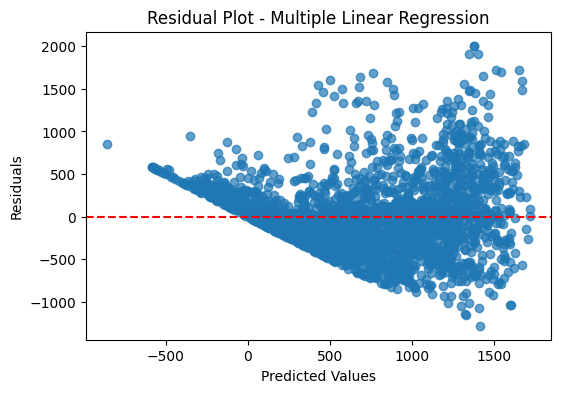

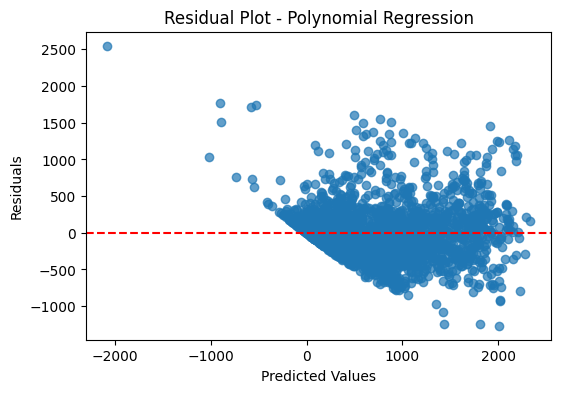

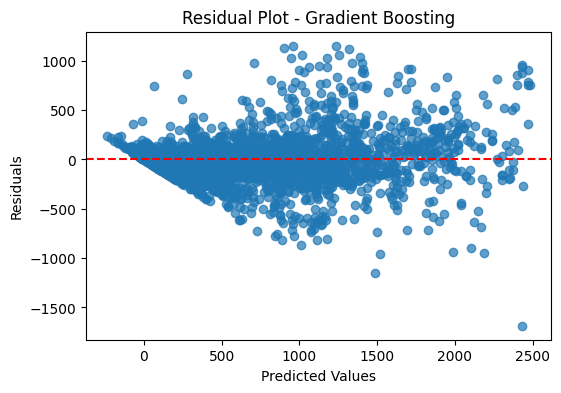

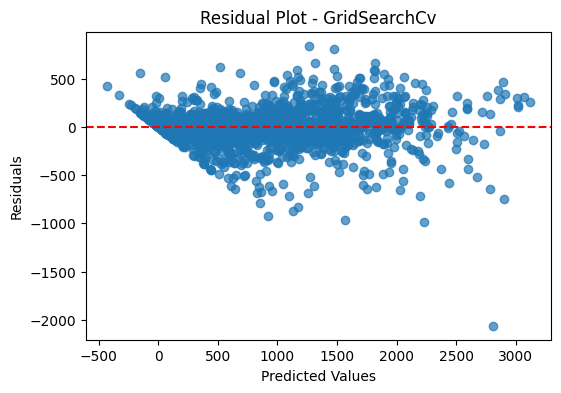

In [61]:
plot_residuals(y_test, y_pred_multiple_lnr, "Multiple Linear Regression")
plot_residuals(y_test, y_pred_poly, "Polynomial Regression")
plot_residuals(y_test, y_pred_gbr, "Gradient Boosting")
plot_residuals(y_test, y_pred_best, "GridSearchCv")

### Feature Importance

In [57]:
#what has driven rental bike demand
importances = grid.best_estimator_.feature_importances_
feature_names = idv.columns
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

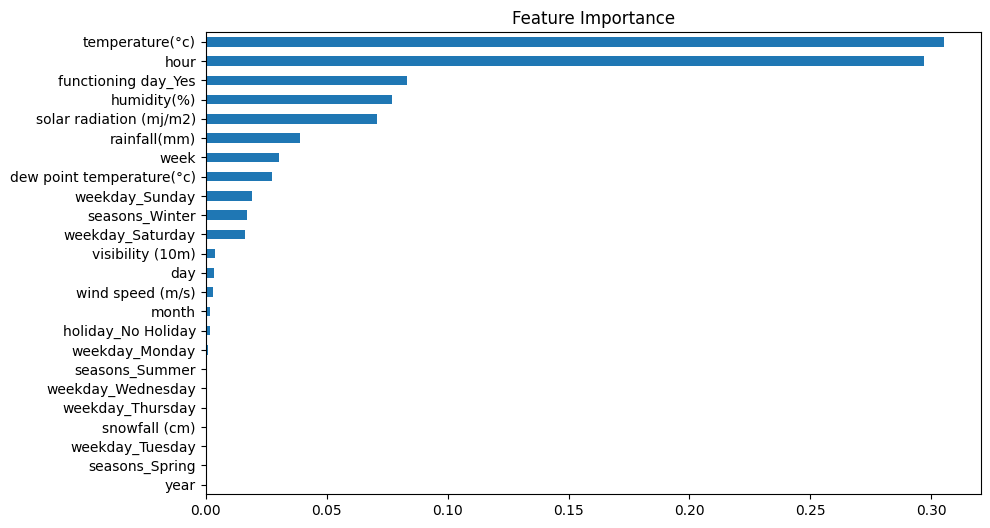

In [58]:
# Plot
feat_imp.plot(kind='barh', figsize=(10,6), title="Feature Importance")
plt.gca().invert_yaxis()
plt.show()

So based on this results we can state that **temperature** and **hour** have the highest effect on rental bike demand rates

In [59]:
seoul_df.tail()

,date,rented bike count,hour,temperature(°c),humidity(%),wind speed (m/s),visibility (10m),dew point temperature(°c),solar radiation (mj/m2),rainfall(mm),snowfall (cm),seasons,holiday,functioning day,datetime,day,month,weekday,week,year
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018-11-30 19:00:00,30,11,Friday,48,2018
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018-11-30 20:00:00,30,11,Friday,48,2018
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018-11-30 21:00:00,30,11,Friday,48,2018
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018-11-30 22:00:00,30,11,Friday,48,2018
8759,2018-11-30,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018-11-30 23:00:00,30,11,Friday,48,2018
